# **Part 1**

# **Import Libraries**

In [32]:
import pandas as pd

Step 1: Read the datasets

In [33]:
# We start by loading all the provided CSV files into pandas DataFrames.
print("--- Step 1: Reading Datasets ---")
df_pesticides = pd.read_csv('/content/pesticides.csv')
df_rainfall = pd.read_csv('/content/rainfall.csv')
df_temp = pd.read_csv('/content/temp.csv')
df_yield = pd.read_csv('/content/yield.csv')
df_yield_df = pd.read_csv('/content/yield_df.csv') # This file appears to be a pre-merged dataset.
print("All CSV files have been loaded into DataFrames.")


--- Step 1: Reading Datasets ---
All CSV files have been loaded into DataFrames.


Step 2: Initial Data Inspection

In [34]:
# It's crucial to inspect each DataFrame to understand its structure, column names,
# data types, and identify any missing values or inconsistencies.

print("\n--- Initial Inspection: pesticides.csv ---")
print(df_pesticides.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df_pesticides.info())

print("\n--- Initial Inspection: rainfall.csv ---")
print(df_rainfall.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df_rainfall.info())

print("\n--- Initial Inspection: temp.csv ---")
print(df_temp.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df_temp.info())

print("\n--- Initial Inspection: yield.csv ---")
print(df_yield.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df_yield.info())

print("\n--- Initial Inspection: yield_df.csv (Pre-merged dataset) ---")
print(df_yield_df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df_yield_df.info())


--- Initial Inspection: pesticides.csv ---
| Domain         | Area    | Element   | Item               | Year   | Unit                         | Value   |
|:---------------|:--------|:----------|:-------------------|:-------|:-----------------------------|:--------|
| Pesticides Use | Albania | Use       | Pesticides (total) | 1990   | tonnes of active ingredients | 121     |
| Pesticides Use | Albania | Use       | Pesticides (total) | 1991   | tonnes of active ingredients | 121     |
| Pesticides Use | Albania | Use       | Pesticides (total) | 1992   | tonnes of active ingredients | 121     |
| Pesticides Use | Albania | Use       | Pesticides (total) | 1993   | tonnes of active ingredients | 121     |
| Pesticides Use | Albania | Use       | Pesticides (total) | 1994   | tonnes of active ingredients | 201     |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------

Step 3: Data Cleaning and Preprocessing

In [35]:
# Based on the initial inspection, we identified some issues:
# - `rainfall.csv`: ' average_rain_fall_mm_per_year' is an object type and has missing values.
#   Also, the ' Area' column has leading/trailing spaces.
# - `temp.csv`: 'avg_temp' has missing values.

print("\n--- Step 3: Cleaning and Preprocessing Data ---")

# Clean up df_rainfall: Remove leading/trailing spaces from column names and 'Area' column,
# convert 'average_rain_fall_mm_per_year' to numeric, and impute missing values.
df_rainfall.columns = df_rainfall.columns.str.strip()
df_rainfall['Area'] = df_rainfall['Area'].str.strip()
df_rainfall['average_rain_fall_mm_per_year'] = pd.to_numeric(
    df_rainfall['average_rain_fall_mm_per_year'], errors='coerce'
)
df_rainfall['average_rain_fall_mm_per_year'].fillna(
    df_rainfall['average_rain_fall_mm_per_year'].mean(), inplace=True
)
print("\nCleaned rainfall.csv:")
print(df_rainfall.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df_rainfall.info())

# Clean up df_temp: Remove leading/trailing spaces from column names and 'country' column,
# and impute missing 'avg_temp' values.
df_temp.columns = df_temp.columns.str.strip()
df_temp['country'] = df_temp['country'].str.strip()
df_temp['avg_temp'].fillna(df_temp['avg_temp'].mean(), inplace=True)
print("\nCleaned temp.csv:")
print(df_temp.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df_temp.info())


--- Step 3: Cleaning and Preprocessing Data ---

Cleaned rainfall.csv:
| Area        | Year   | average_rain_fall_mm_per_year   |
|:------------|:-------|:--------------------------------|
| Afghanistan | 1985   | 327                             |
| Afghanistan | 1986   | 327                             |
| Afghanistan | 1987   | 327                             |
| Afghanistan | 1989   | 327                             |
| Afghanistan | 1990   | 327                             |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  6727 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB
None

Cleaned temp.csv:
| year   | country   

/tmp/ipython-input-2793541646.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rainfall['average_rain_fall_mm_per_year'].fillna(
/tmp/ipython-input-2793541646.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Step 4: Rename Columns for Merging Consistency

In [36]:
# To ensure successful merging, we align column names across DataFrames.
print("\n--- Step 4: Renaming Columns for Consistency ---")
df_pesticides = df_pesticides.rename(columns={'Value': 'pesticides_tonnes', 'Area': 'country', 'Year': 'year'})
df_rainfall = df_rainfall.rename(columns={'Area': 'country', 'Year': 'year'})
df_temp = df_temp.rename(columns={'country': 'country', 'year': 'year'})
df_yield = df_yield.rename(columns={'Value': 'hg/ha_yield', 'Area': 'country', 'Item': 'Crop', 'Year': 'year'})
print("Columns renamed for merging consistency.")


--- Step 4: Renaming Columns for Consistency ---
Columns renamed for merging consistency.


Step 5: Join the Multiple Datasets

In [37]:
# We will merge df_yield with pesticides, rainfall, and temperature data
# using 'country' and 'year' as common keys. This creates a comprehensive dataset.
print("\n--- Step 5: Merging Datasets ---")

# Merge df_yield with df_pesticides
merged_df = pd.merge(df_yield, df_pesticides[['country', 'year', 'pesticides_tonnes']],
                     on=['country', 'year'], how='left')

# Merge the result with df_rainfall
merged_df = pd.merge(merged_df, df_rainfall[['country', 'year', 'average_rain_fall_mm_per_year']],
                     on=['country', 'year'], how='left')

# Merge the result with df_temp
merged_df = pd.merge(merged_df, df_temp[['country', 'year', 'avg_temp']],
                     on=['country', 'year'], how='left')

print("\n--- Merged DataFrame Head (After Initial Merge) ---")
print(merged_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\n--- Merged DataFrame Info (After Initial Merge) ---")
print(merged_df.info())


--- Step 5: Merging Datasets ---

--- Merged DataFrame Head (After Initial Merge) ---
| Domain Code   | Domain   | Area Code   | country     | Element Code   | Element   | Item Code   | Crop   | Year Code   | year   | Unit   | hg/ha_yield   | pesticides_tonnes   | average_rain_fall_mm_per_year   | avg_temp   |
|:--------------|:---------|:------------|:------------|:---------------|:----------|:------------|:-------|:------------|:-------|:-------|:--------------|:--------------------|:--------------------------------|:-----------|
| QC            | Crops    | 2           | Afghanistan | 5419           | Yield     | 56          | Maize  | 1961        | 1961   | hg/ha  | 14000         | nan                 | nan                             | 14.23      |
| QC            | Crops    | 2           | Afghanistan | 5419           | Yield     | 56          | Maize  | 1962        | 1962   | hg/ha  | 14000         | nan                 | nan                             | 14.1       |
| QC     

Step 6: Final Data Cleaning (Impute Missing Values After Merge)

In [38]:
# After merging, some columns might still have missing values due to non-matching
# entries across datasets. We impute these missing values with the mean.
print("\n--- Step 6: Imputing Missing Values in Merged Data ---")

print("Missing values before imputation:")
print(merged_df.isnull().sum().to_markdown(numalign="left", stralign="left"))

merged_df['pesticides_tonnes'].fillna(merged_df['pesticides_tonnes'].mean(), inplace=True)
merged_df['average_rain_fall_mm_per_year'].fillna(merged_df['average_rain_fall_mm_per_year'].mean(), inplace=True)
merged_df['avg_temp'].fillna(merged_df['avg_temp'].mean(), inplace=True)

print("\nMissing values after imputation:")
print(merged_df.isnull().sum().to_markdown(numalign="left", stralign="left"))



--- Step 6: Imputing Missing Values in Merged Data ---
Missing values before imputation:
|                               | 0     |
|:------------------------------|:------|
| Domain Code                   | 0     |
| Domain                        | 0     |
| Area Code                     | 0     |
| country                       | 0     |
| Element Code                  | 0     |
| Element                       | 0     |
| Item Code                     | 0     |
| Crop                          | 0     |
| Year Code                     | 0     |
| year                          | 0     |
| Unit                          | 0     |
| hg/ha_yield                   | 0     |
| pesticides_tonnes             | 69448 |
| average_rain_fall_mm_per_year | 56296 |
| avg_temp                      | 24507 |

Missing values after imputation:
|                               | 0   |
|:------------------------------|:----|
| Domain Code                   | 0   |
| Domain                        | 0   |
| 

/tmp/ipython-input-935032535.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['pesticides_tonnes'].fillna(merged_df['pesticides_tonnes'].mean(), inplace=True)
/tmp/ipython-input-935032535.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

Step 7: Basic Exploratory Data Analysis (EDA) on the Merged Data

In [39]:
 # Now that the data is merged and cleaned, we perform some basic analysis
# to understand the combined dataset.
print("\n--- Step 7: Basic Exploratory Data Analysis on Merged Data ---")

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(merged_df[['hg/ha_yield', 'pesticides_tonnes', 'average_rain_fall_mm_per_year', 'avg_temp']].describe().to_markdown(numalign="left", stralign="left"))

# Unique countries and crops
print("\nNumber of unique countries:")
print(f"Number of unique countries: {merged_df['country'].nunique()}")

print("\nTop 10 unique crops:")
print(merged_df['Crop'].value_counts().head(10).to_markdown(numalign="left", stralign="left"))

print("\nNumber of unique crops:")
print(f"Number of unique crops: {merged_df['Crop'].nunique()}")


--- Step 7: Basic Exploratory Data Analysis on Merged Data ---

Descriptive statistics for numerical columns:
|       | hg/ha_yield   | pesticides_tonnes   | average_rain_fall_mm_per_year   | avg_temp   |
|:------|:--------------|:--------------------|:--------------------------------|:-----------|
| count | 109366        | 109366              | 109366                          | 109366     |
| mean  | 65054.7       | 38414.6             | 1142.83                         | 19.6925    |
| std   | 69140.6       | 71501.3             | 501.189                         | 5.93448    |
| min   | 0             | 0                   | 51                              | -4.24      |
| 25%   | 16270.2       | 32223.4             | 1083                            | 16.75      |
| 50%   | 37015.5       | 38414.6             | 1142.83                         | 19.6925    |
| 75%   | 94200         | 38414.6             | 1142.83                         | 25.16      |
| max   | 1e+06         | 1.807e+0

Step 8: Save the Final Merged Dataset

In [40]:
# Finally, we save the cleaned and merged DataFrame to a new CSV file.
merged_df.to_csv('final_merged_data.csv', index=False)
print("\nFinal merged data saved to 'final_merged_data.csv'")


Final merged data saved to 'final_merged_data.csv'


# Part 2

**Import Libraries**

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


**Step 1: Load the final_merged_data.csv file**

In [42]:
# We'll load the final, merged dataset as the foundation for our model.
print("--- Step 1: Loading the merged dataset ---")
try:
    df = pd.read_csv('/content/final_merged_data.csv')
    print("Dataset loaded successfully. Here's a preview:")
    print(df.head())
    print(df.info())
except FileNotFoundError:
    print("Error: 'final_merged_data (1).csv' not found. Please ensure the file is in the correct directory.")
    exit()


--- Step 1: Loading the merged dataset ---
Dataset loaded successfully. Here's a preview:
  Domain Code Domain  Area Code      country  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Crop  Year Code  year   Unit  hg/ha_yield  pesticides_tonnes  \
0  Maize       1961  1961  hg/ha        14000       38414.593847   
1  Maize       1962  1962  hg/ha        14000       38414.593847   
2  Maize       1963  1963  hg/ha        14260       38414.593847   
3  Maize       1964  1964  hg/ha        14257       38414.593847   
4  Maize       1965  1965  hg/ha        14400       38414.593847   

   average_rai

Step 2: Define Dependent and Independent Variables

In [43]:
# The dependent variable (y) is 'hg/ha_yield', which is what we want to predict.
# The independent variables (features) are the factors that will be used for prediction.
print("\n--- Step 2: Defining Dependent and Independent Variables ---")
target = 'hg/ha_yield'
y = df[target]

features = df.drop(columns=[
    'Domain Code', 'Domain', 'Area Code', 'Element Code', 'Element',
    'Item Code', 'Year Code', 'Unit', target
])

print(f"Dependent variable (y) selected: '{target}'")
print(f"Shape of y: {y.shape}")
print("\nSelected independent variables (features) preview:")
print(features.head())
print(f"Shape of features: {features.shape}")


--- Step 2: Defining Dependent and Independent Variables ---
Dependent variable (y) selected: 'hg/ha_yield'
Shape of y: (109366,)

Selected independent variables (features) preview:
       country   Crop  year  pesticides_tonnes  average_rain_fall_mm_per_year  \
0  Afghanistan  Maize  1961       38414.593847                    1142.832563   
1  Afghanistan  Maize  1962       38414.593847                    1142.832563   
2  Afghanistan  Maize  1963       38414.593847                    1142.832563   
3  Afghanistan  Maize  1964       38414.593847                    1142.832563   
4  Afghanistan  Maize  1965       38414.593847                    1142.832563   

   avg_temp  
0     14.23  
1     14.10  
2     15.01  
3     13.73  
4     13.90  
Shape of features: (109366, 6)


Step 3: Handle Categorical Variables (One-Hot Encoding)

In [44]:
# We convert categorical text data into a numerical format that the model can understand.
print("\n--- Step 3: Handling Categorical Variables (One-Hot Encoding) ---")
categorical_cols = features.select_dtypes(include=['object']).columns
X = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

print("\nFeatures DataFrame after One-Hot Encoding preview:")
print(X.head())
print(X.info())


--- Step 3: Handling Categorical Variables (One-Hot Encoding) ---

Features DataFrame after One-Hot Encoding preview:
   year  pesticides_tonnes  average_rain_fall_mm_per_year  avg_temp  \
0  1961       38414.593847                    1142.832563     14.23   
1  1962       38414.593847                    1142.832563     14.10   
2  1963       38414.593847                    1142.832563     15.01   
3  1964       38414.593847                    1142.832563     13.73   
4  1965       38414.593847                    1142.832563     13.90   

   country_Albania  country_Algeria  country_American Samoa  country_Angola  \
0            False            False                   False           False   
1            False            False                   False           False   
2            False            False                   False           False   
3            False            False                   False           False   
4            False            False                   False

Step 4: Split Data into Training and Testing Sets

In [45]:
# This is a critical step. We split the data into training and testing sets *before*
# scaling to prevent data leakage, which would cause the model to learn information
# from the test set and give an artificially high performance score.
print("\n--- Step 4: Splitting the Data into Training and Testing Sets ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


--- Step 4: Splitting the Data into Training and Testing Sets ---
Shape of X_train: (87492, 224)
Shape of X_test: (21874, 224)
Shape of y_train: (87492,)
Shape of y_test: (21874,)


Step 5: Normalize and Scale the Data with MinMaxScaler

In [46]:
# We'll use MinMaxScaler to scale both the features and the target variable
# so all values fall between 0 and 1. This is a common requirement for certain
# algorithms and ensures all features contribute equally.
print("\n--- Step 5: Scaling the Data with MinMaxScaler ---")

# Initialize the scalers for features and the target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit the feature scaler on the training data and transform both training and test data.
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Reshape the target data before scaling
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Fit the target scaler on the training target and transform both training and test targets.
y_train_scaled = target_scaler.fit_transform(y_train_reshaped).flatten()
y_test_scaled = target_scaler.transform(y_test_reshaped).flatten()

print("Data scaled successfully. All values are now between 0 and 1.")



--- Step 5: Scaling the Data with MinMaxScaler ---
Data scaled successfully. All values are now between 0 and 1.


Step 6: Train the Model

In [47]:
# We now train the RandomForestRegressor model using the scaled training data.
print("\n--- Step 6: Training the RandomForestRegressor Model on scaled data ---")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train_scaled)
print("Model trained successfully on scaled data.")


--- Step 6: Training the RandomForestRegressor Model on scaled data ---
Model trained successfully on scaled data.



Comprehensive Scaling Process

In [48]:
# Features scaled to 0-1 range
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Target variable also scaled to 0-1 range
y_train_scaled = target_scaler.fit_transform(y_train_reshaped).flatten()
y_test_scaled = target_scaler.transform(y_test_reshaped).flatten()

Step 7: Evaluate the Model

In [49]:
# We make predictions on the scaled test data and then reverse the scaling
# to get the metrics in the original units for a more meaningful interpretation.
print("\n--- Step 7: Evaluating the Model on scaled data ---")
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the scaled predictions to their original units
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = y_test.values

# Calculate evaluation metrics using the original-scaled values
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.4f}")

print("\nMachine learning pipeline with scaling and training complete!")


--- Step 7: Evaluating the Model on scaled data ---
Mean Absolute Error (MAE): 3244.89
Mean Squared Error (MSE): 123556110.26
Root Mean Squared Error (RMSE): 11115.58
R-squared (R2 Score): 0.9747

Machine learning pipeline with scaling and training complete!


Try Additional Algorithms:

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Compare multiple algorithms
algorithms = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(kernel='rbf'),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), random_state=42, max_iter=1000)
}


Cross-Validation for Robustness:

In [52]:
# Quick validation with reduced parameters
light_rf = RandomForestRegressor(n_estimators=30, max_depth=15, random_state=42, n_jobs=1)
cv_scores = cross_val_score(light_rf, X_train_scaled, y_train_scaled, cv=3, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {cv_scores.mean():.4f}")


Cross-validation R² scores: [0.88483863 0.8846808  0.89174281]
Mean CV R² score: 0.8871


Feature Importance Analysis:


--- Feature Importance Analysis ---
Top 15 most important features for yield prediction:
                           feature  importance
217                  Crop_Potatoes    0.255933
221            Crop_Sweet potatoes    0.087812
0                             year    0.084179
218               Crop_Rice, paddy    0.072498
2    average_rain_fall_mm_per_year    0.049098
3                         avg_temp    0.044033
1                pesticides_tonnes    0.042192
215                     Crop_Maize    0.039679
94                   country_India    0.027733
222                     Crop_Wheat    0.021489
219                   Crop_Sorghum    0.018505
102                  country_Japan    0.017826
220                  Crop_Soybeans    0.017566
41                   country_China    0.015188
202         country_United Kingdom    0.014614


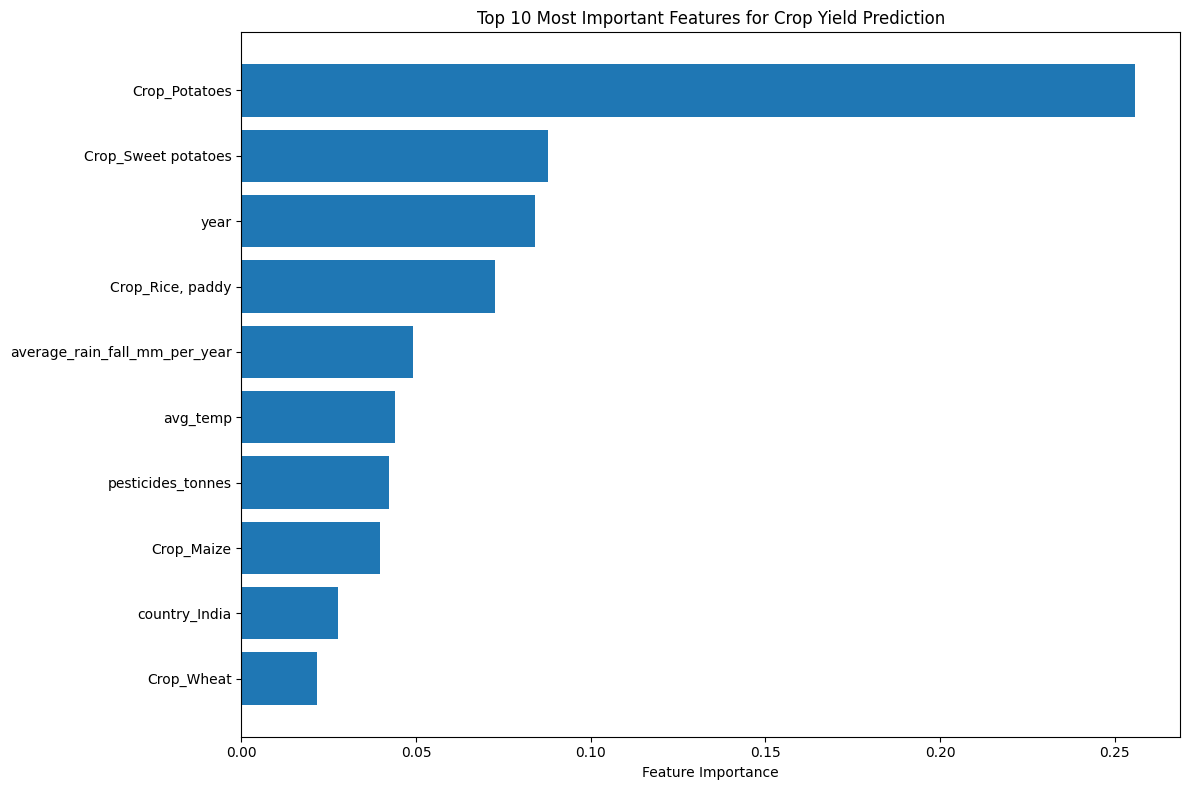


Top 10 features contribute 72.46% of total importance

Number of features needed for 90% of predictive power: 34


In [53]:
# --- Feature Importance Analysis ---
print("\n--- Feature Importance Analysis ---")

# Get feature importance from your original trained model
feature_importance = pd.DataFrame({
    'feature': X.columns,  # Feature names from your original X dataframe
    'importance': model.feature_importances_  # Importance scores from your trained model
}).sort_values('importance', ascending=False)

# Display top 15 most important features
print("Top 15 most important features for yield prediction:")
print(feature_importance.head(15))

# Create a visualization of feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features for Crop Yield Prediction')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

# Show percentage contribution of top features
print(f"\nTop 10 features contribute {top_features['importance'].sum():.2%} of total importance")

# Cumulative importance analysis
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()
features_90_percent = feature_importance[feature_importance['cumulative_importance'] <= 0.90]
print(f"\nNumber of features needed for 90% of predictive power: {len(features_90_percent)}")



Create a Simplified Model:

In [54]:
# Use only top N most important features
top_n_features = 20  # Adjust based on your results
important_features = feature_importance.head(top_n_features)['feature'].tolist()

# Create simplified dataset
X_simplified = X[important_features]
X_train_simp, X_test_simp, _, _ = train_test_split(X_simplified, y, test_size=0.2, random_state=42)

# Scale simplified features
scaler_simp = MinMaxScaler()
X_train_simp_scaled = scaler_simp.fit_transform(X_train_simp)
X_test_simp_scaled = scaler_simp.transform(X_test_simp)

# Train simplified model
model_simplified = RandomForestRegressor(n_estimators=100, random_state=42)
model_simplified.fit(X_train_simp_scaled, y_train_scaled)

# Evaluate simplified model
y_pred_simp = model_simplified.predict(X_test_simp_scaled)
r2_simplified = r2_score(y_test_scaled, y_pred_simp)
print(f"Simplified model R² score: {r2_simplified:.4f}")


Simplified model R² score: 0.8805


Save the model


In [55]:
import joblib

# Save all components for future use
joblib.dump(model, 'crop_yield_model.pkl')
joblib.dump(feature_scaler, 'feature_scaler.pkl')
joblib.dump(target_scaler, 'target_scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')

print("Model pipeline saved successfully!")


Model pipeline saved successfully!
